In [1]:
from keras.models import Model
from keras.layers import Dense, Input, Conv2D, MaxPool2D, Flatten, GlobalAveragePooling2D
from keras.losses import categorical_crossentropy
from keras.optimizers import adam
from sklearn.model_selection import train_test_split
import numpy as np

import matplotlib.pyplot as plt
import pandas as pd
from keras.preprocessing.image import load_img
from sklearn.preprocessing import OneHotEncoder

Using TensorFlow backend.


In [2]:
mnist = pd.read_csv("../datasets/mnist_train_small.csv", header=None).values

In [3]:
X, y = mnist[:, 1:].reshape(-1, 28, 28, 1), mnist[:, 0]

In [4]:
ohe = OneHotEncoder(categories="auto")

In [5]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [6]:
y_hot = ohe.fit_transform(y.reshape(-1, 1)).todense()

In [7]:
y[:5]

array([6, 5, 7, 9, 5])

In [8]:
y_hot[:5]

matrix([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

In [9]:
MaxPool2D?

Init signature:
MaxPool2D(
    ['pool_size=(2, 2)', 'strides=None', "padding='valid'", 'data_format=None', '**kwargs'],
)
Docstring:     
Max pooling operation for spatial data.

# Arguments
    pool_size: integer or tuple of 2 integers,
        factors by which to downscale (vertical, horizontal).
        (2, 2) will halve the input in both spatial dimension.
        If only one integer is specified, the same window length
        will be used for both dimensions.
    strides: Integer, tuple of 2 integers, or None.
        Strides values.
        If None, it will default to `pool_size`.
    padding: One of `"valid"` or `"same"` (case-insensitive).
    data_format: A string,
        one of `channels_last` (default) or `channels_first`.
        The ordering of the dimensions in the inputs.
        `channels_last` corresponds to inputs with shape
        `(batch, height, width, channels)` while `channels_first`
        corresponds to inputs with shape
        `(batch, channels, height, w

In [10]:
in_layer = Input((28,28, 1))
conv1 = Conv2D(16, (3, 3))(in_layer)
pool1 = MaxPool2D()(conv1)
conv2 = Conv2D(32, (3, 3))(pool1)
pool2 = MaxPool2D()(conv2)
flat = Flatten()(pool2)
d1 = Dense(400, activation="tanh")(flat)
d2 = Dense(200, activation="tanh")(d1)
d3 = Dense(100, activation="tanh")(d2)
out = Dense(10, activation="softmax")(d3)

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
model = Model(inputs=[in_layer], outputs=[out])

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 400)               320400    
__________

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y_hot, test_size=0.33, random_state=42)

In [14]:
# X_train

In [15]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train, epochs=10, batch_size=5000)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
13400/13400 [==============================] - 4s 317us/step - loss: 2.0675 - acc: 0.3150
Epoch 2/10
13400/13400 [==============================] - 4s 311us/step - loss: 1.0767 - acc: 0.7387
Epoch 3/10
13400/13400 [==============================] - 4s 285us/step - loss: 0.7102 - acc: 0.8213
Epoch 4/10
13400/13400 [==============================] - 4s 265us/step - loss: 0.5290 - acc: 0.8662
Epoch 5/10
13400/13400 [==============================] - 4s 309us/step - loss: 0.4172 - acc: 0.8904
Epoch 6/10
13400/13400 [==============================] - 4s 265us/step - loss: 0.3527 - acc: 0.9038
Epoch 7/10
13400/13400 [==============================] - 4s 283us/step - loss: 0.3050 - acc: 0.9172
Epoch 8/10
13400/13400 [==============================] - 4s 290us/step - loss: 0.2676 - acc: 0.9275
Epoch 9/10
13400/13400 [==============================] - 4s 266us/step - loss: 0.2414 - acc: 0.9331
Epoch 10/10
13400/13400 [==================

In [16]:
model.evaluate(X_test, y_test)

6600/6600 [==============================] - 1s 150us/step


[0.23809104480526663, 0.9304545454545454]

In [15]:
len(X_test)

6600

In [17]:
model.predict(X_test[:1])

array([[1.9313325e-03, 2.5190346e-04, 5.6790275e-04, 8.3959528e-04,
        6.0667746e-02, 7.3758018e-04, 6.4350030e-04, 3.7826765e-03,
        1.8323947e-02, 9.1225392e-01]], dtype=float32)

In [19]:
y_test[:1].argmax(axis=1)

matrix([[9]])

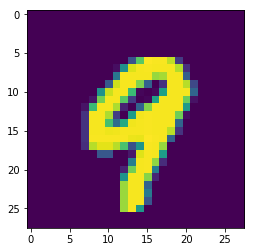

In [20]:
plt.imshow(X_test[0].reshape(28, 28))

/usr/local/lib/python3.7/site-packages/keras_preprocessing/image/utils.py:98: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


array([[0, 8, 5, 6, 4, 9, 3, 7, 1, 2]])

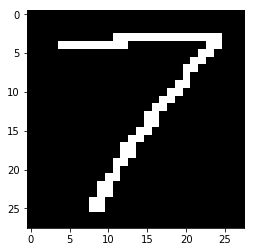

In [18]:
img = load_img("../datasets/nums/seven.jpeg", target_size=(28, 28), grayscale=True)
type(img)
plane = (np.array(img) < 100).astype(int) * 255
plt.imshow(plane, cmap="gray")
model.predict(np.array([plane.reshape(28, 28, 1)])).argsort(axis=1)

In [ ]:
for layer in model.layers[:3]:
    layer.trainable = False

In [39]:
m2 = Model(inputs=[in_layer], outputs=[pool2])

In [40]:
m2.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [41]:
batches = m2.predict(X[:1])

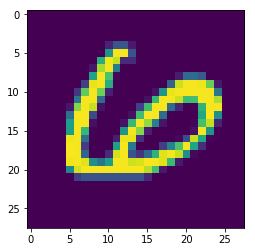

In [42]:
plt.imshow(X[0].reshape(28, 28))

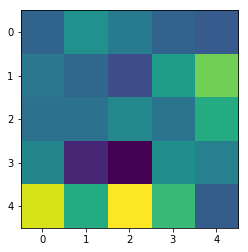

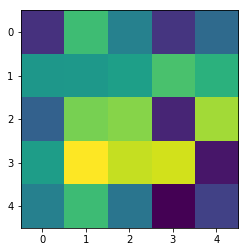

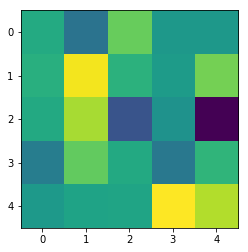

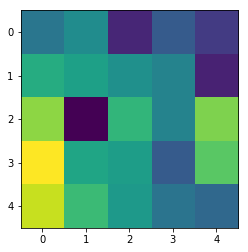

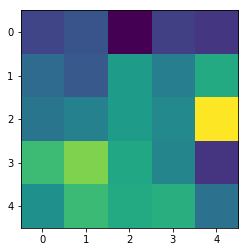

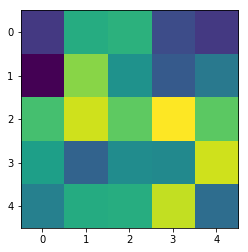

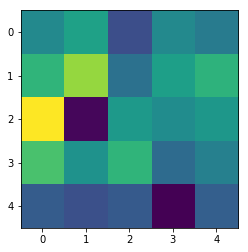

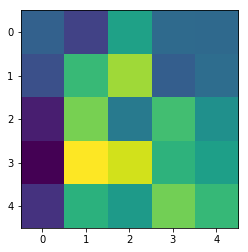

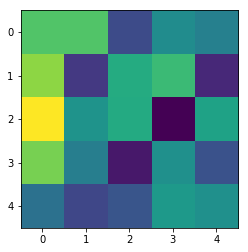

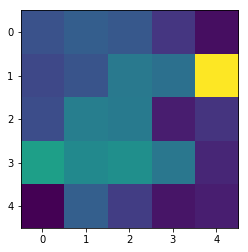

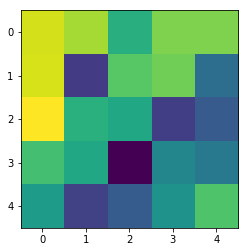

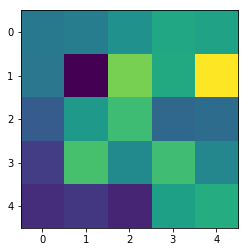

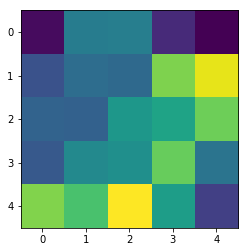

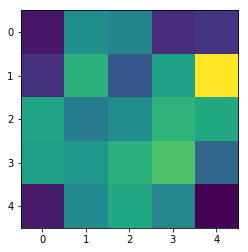

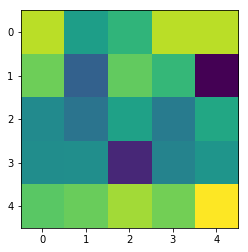

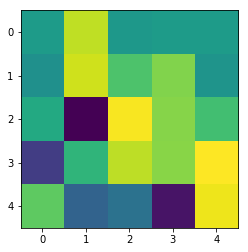

In [43]:
for batch in batches:
    for i in range(16):
        img = batch[:, :, i]
        plt.figure()
        plt.imshow(img)

In [48]:
fils, bias = model.layers[1].get_weights()

In [50]:
type(fils)

numpy.ndarray

In [51]:
bias.shape

(16,)

In [59]:
in_layer = model.input
d3 = Dense(100, activation="relu")(model.layers[7].output)
out = Dense(10, activation="softmax")(d3)

In [60]:
for i in range(7):
    model.layers[i].trainable = False

In [61]:
m3 = Model(inputs=[in_layer], outputs=[out])

In [63]:
m3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 400)               320400    
__________

In [64]:
m3.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
m3.fit(X_train, y_train, epochs=10, batch_size=500)

Epoch 1/10
13399/13399 [==============================] - 1s 107us/step - loss: 3.6583 - acc: 0.6907
Epoch 2/10
13399/13399 [==============================] - 1s 87us/step - loss: 0.2508 - acc: 0.9559
Epoch 3/10
13399/13399 [==============================] - 1s 96us/step - loss: 0.1130 - acc: 0.9761
Epoch 4/10
13399/13399 [==============================] - 1s 93us/step - loss: 0.0588 - acc: 0.9856
Epoch 5/10
13399/13399 [==============================] - 1s 91us/step - loss: 0.0302 - acc: 0.9931
Epoch 6/10
13399/13399 [==============================] - 1s 89us/step - loss: 0.0175 - acc: 0.9970
Epoch 7/10
13399/13399 [==============================] - 1s 91us/step - loss: 0.0116 - acc: 0.9982
Epoch 8/10
13399/13399 [==============================] - 1s 93us/step - loss: 0.0084 - acc: 0.9993
Epoch 9/10
13399/13399 [==============================] - 1s 91us/step - loss: 0.0066 - acc: 0.9996
Epoch 10/10
13399/13399 [==============================] - 1s 90us/step - loss: 0.0058 - acc: 0.999

In [58]:
m3.evaluate(X_test, y_test)

6600/6600 [==============================] - 1s 132us/step


[0.16056365145793694, 0.9684848484848485]